# A neural network with a Perceptron

Нейронная сеть с одним слоем, состоящим из одного или нескольких перцептронов, часто называется "Однослойным перцептроном" **(SLP - Single-Layer Perceptron)**. Перцептрон является основной строительной единицей нейронной сети, а однослойный перцептрон представляет собой самую простую форму нейронной модели.

Вот разбивка компонентов:


**Перцептрон** - это основная вычислительная единица, которая принимает несколько входных значений, назначает им веса, суммирует их и подает результат через функцию активации, чтобы получить выход. Математически выход перцептрона может быть представлен как:

``output = activation_function(weighted_sum_of_inputs + bias)``

- ``Single-Layer`` - Однослойность:
В контексте однослойного перцептрона есть только один слой: выходной слой. Входные значения прямо связаны с перцептронами в этом слое, и выходы перцептронов формируют окончательный выход сети.

- ``Activation Function`` - Функция активации:
Функция активации определяет, будет ли перцептрон "срабатывать" (производить выход) или нет на основе взвешенной суммы входов. Обычные функции активации, используемые в перцептронах, включают ступенчатые функции, сигмоидные функции и функции ReLU (Rectified Linear Unit).

- ``Weights and Bias`` - Веса и смещение:
Каждому входному значению соответствует вес, который определяет силу соединения. Перцептрон также имеет термин смещения, который можно рассматривать как пороговое значение. Взвешенная сумма входов плюс смещение используется для вычисления выхода.

Целью SLP является изучение линейных границ решений для задач классификации. Однако важно отметить, что SLP имеют ограничения в своей способности изучать сложные паттерны или выполнять задачи, требующие нелинейных границ решений.

Если вам нужно обрабатывать более сложные паттерны и задачи, обычно используется "Многослойный перцептрон" (MLP) с несколькими скрытыми слоями между входным и выходным слоями. Добавление скрытых слоев позволяет сети улавливать нелинейные отношения и выполнять более сложные вычисления.

Подытоживая, нейронная сеть с одним слоем перцептронов называется Однослойным перцептроном (SLP). Несмотря на ограничения SLP, они служат как фундаментальное понятие для понимания нейронных сетей и их возможностей.

In [8]:
import numpy as np
import pandas as pd
import sklearn

from pandas import Series, DataFrame
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
standardize = StandardScaler()

standardized_X_test = standardize.fit_transform(X_test)

standardized_X_train = standardize.fit_transform(X_train)

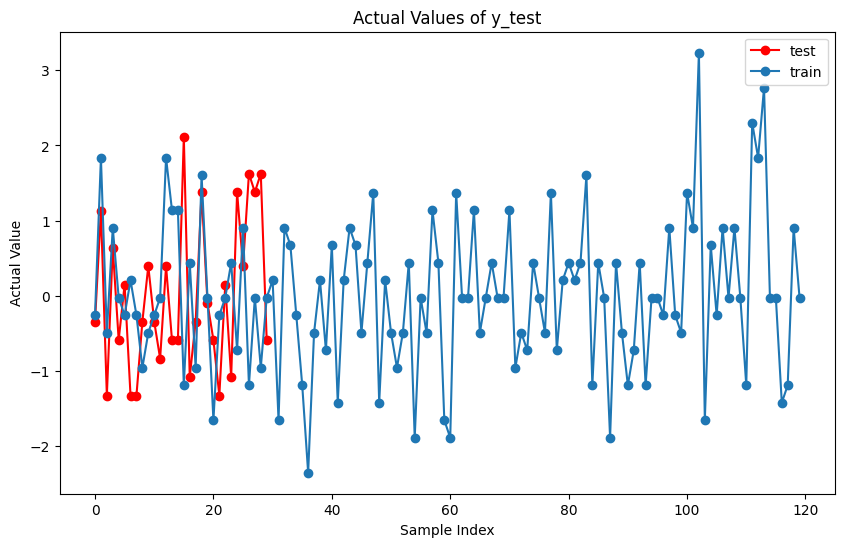

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(standardized_X_test[:,1], marker='o', color='red', label='test')
plt.plot(standardized_X_train[:,1], marker='o', label='train')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.title('Actual Values of y_test')
plt.legend()
plt.show()

In [45]:
standardized_X_test[0:10,]

array([[ 0.77551498, -0.34458657,  0.4481435 ,  0.28082909],
       [-0.77551498,  1.13221301, -1.32229995, -1.30646579],
       [ 0.41758499, -1.32911962,  0.78010164,  0.76922752],
       [-1.13344497,  0.63994648, -1.3776263 , -1.18436618],
       [ 0.53689499, -0.59071983,  1.05673343,  1.13552634],
       [ 0.77551498,  0.14767996,  1.00140707,  1.50182516],
       [-1.01413498, -1.32911962,  0.00553264,  0.15872949],
       [-0.29827499, -1.32911962,  0.00553264, -0.08546972],
       [ 1.01413498, -0.34458657,  0.66944893,  1.25762595],
       [-1.49137497,  0.39381322, -1.10099452, -1.30646579]])

In [52]:
perceptron = Perceptron(max_iter=50, eta0=0.15, tol=1e-3, random_state=15)

perceptron.fit(standardized_X_train, y_train.ravel())

# Print all model parameters
print("Model Parameters:")
print("Coefficients:", perceptron.coef_)
print("Intercept:", perceptron.intercept_)
print("Number of iterations:", perceptron.n_iter_)
print("Tolerance:", perceptron.tol)
print("Learning rate:", perceptron.eta0)
print("Penalty:", perceptron.penalty)
print("Alpha:", perceptron.alpha)
print("Random state:", perceptron.random_state)

Model Parameters:
Coefficients: [[-0.03993128  0.11300566 -0.18474753 -0.26982388]
 [-0.07679091 -0.23649638  0.46831351 -0.55243242]
 [ 0.06296855 -0.21610876  0.69387736  0.64024294]]
Intercept: [-0.3  -0.3  -1.05]
Number of iterations: 9
Tolerance: 0.001
Learning rate: 0.15
Penalty: None
Alpha: 0.0001
Random state: 15


In [47]:
y_pred = perceptron.predict(standardized_X_test)

In [48]:
print(y_test)

[1 0 2 0 2 2 1 1 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2 2 2 0 0 2 0 2]


In [49]:
print(y_pred)

[1 0 2 0 2 2 1 1 2 0 0 1 0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 2 0 2]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



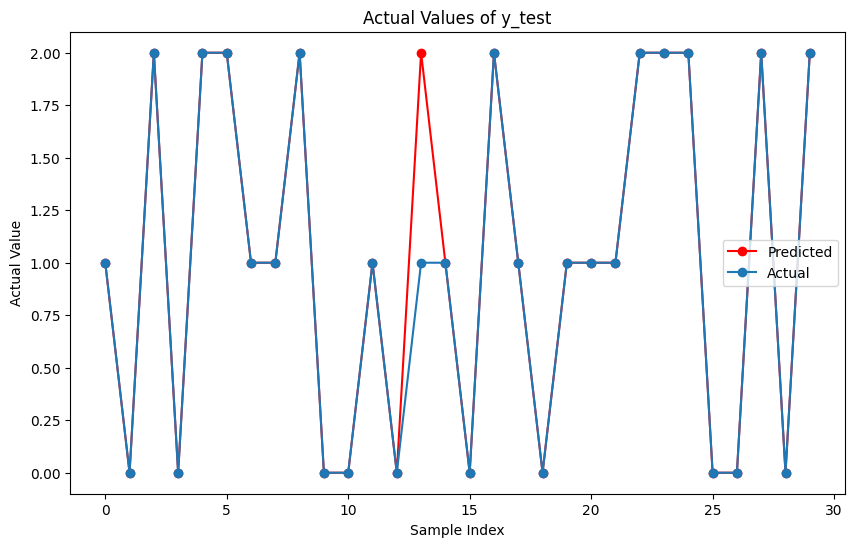

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_pred, marker='o', color='red', label='Predicted')
plt.plot(y_test, marker='o', label='Actual')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.title('Actual Values of y_test')
plt.legend()
plt.show()